## Load list of images

In [1]:
import csv

list_images = list()
with open('data\driving_log.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        steering = float(row[3])
        throttle = float(row[4])
        brake = float(row[5])
        speed = float(row[6])

        if (steering != 0):
            # Center image
            list_images.append([row[0].replace(" ", ""), steering, throttle, brake, speed])

## Load images

In [2]:
from PIL import Image

def generate_sample():

    sample = int(random.random() * len(list_images))

    image = Image.open("data/" + list_images[sample][0])
    steering = list_images[sample][1]

    return image, steering

## Plot images

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import cv2
import numpy as np

# Function to plot images
def plot_images(image, steering, name):
    fig = plt.figure(facecolor="none")
    fig.set_size_inches(20, 5)
    for i in range(len(image)):
        ax=fig.add_subplot(1, len(image), i+1)        
        ax.imshow(image[i])
        ax.set_title("Steering: {:+2.4f}".format(steering[i]), fontsize=20)
        ax.axis('off')
        ax.axis('tight')
    fig.savefig("images/" + name, bbox_inches='tight', transparent=True)

## Augmentation

### Flip image

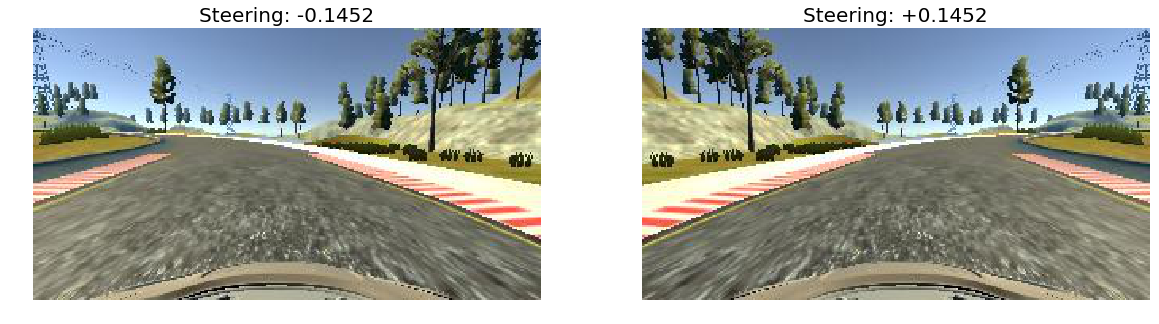

In [4]:
images = list()
steerings = list()

image, steering = generate_sample()
images.append(image)
steerings.append(steering)

def flip_image(img, steering):
    return cv2.flip(img, 1), -steering

image, steering = flip_image(np.copy(image), steering)
images.append(image)
steerings.append(steering)

plot_images(images, steerings, "flip.png")

### Brightness image

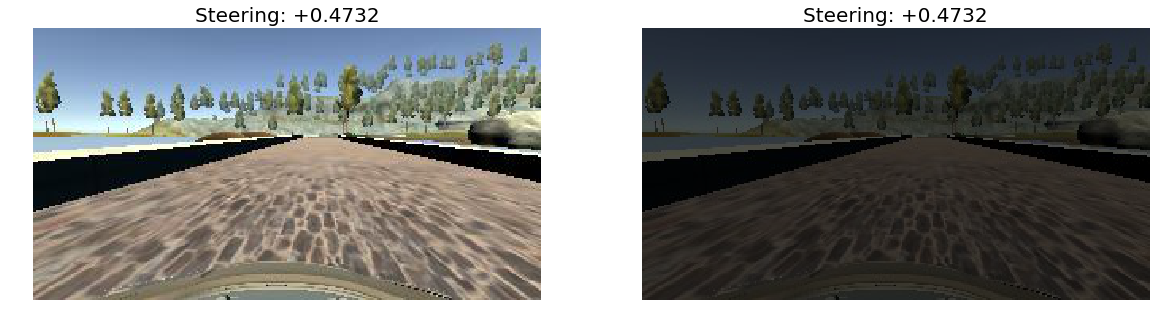

In [5]:
images = list()
steerings = list()

image, steering = generate_sample()
images.append(image)
steerings.append(steering)

def brightness_image(img, steering):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv[:,:,2] = hsv[:,:,2] * 0.3
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR), steering

image, steering = brightness_image(np.copy(image), steering)
images.append(image)
steerings.append(steering)

plot_images(images, steerings, "bright.png")

### Rotate image

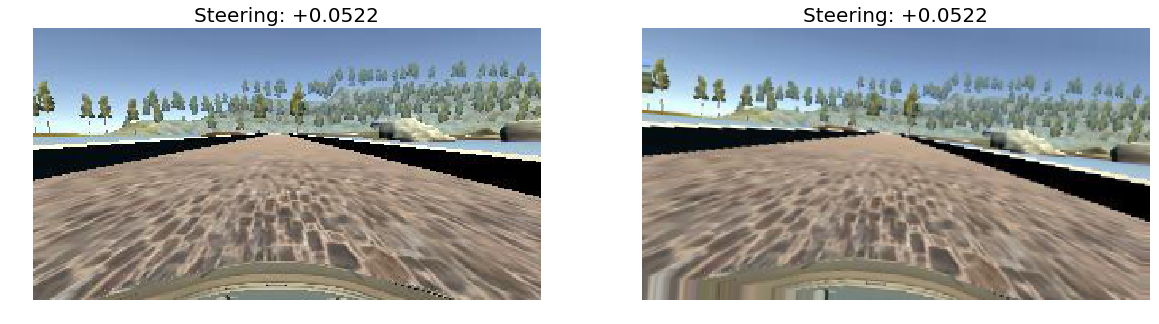

In [6]:
images = list()
steerings = list()

image, steering = generate_sample()
images.append(image)
steerings.append(steering)

def rotate_image(img, steering):
    rows,cols,channel = img.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2), -5, 1)
    return cv2.warpAffine(img,M,(cols,rows), borderMode=1), steering

image, steering = rotate_image(np.copy(image), steering)
images.append(image)
steerings.append(steering)
    
plot_images(images, steerings, "rotate.png")

### Translate image

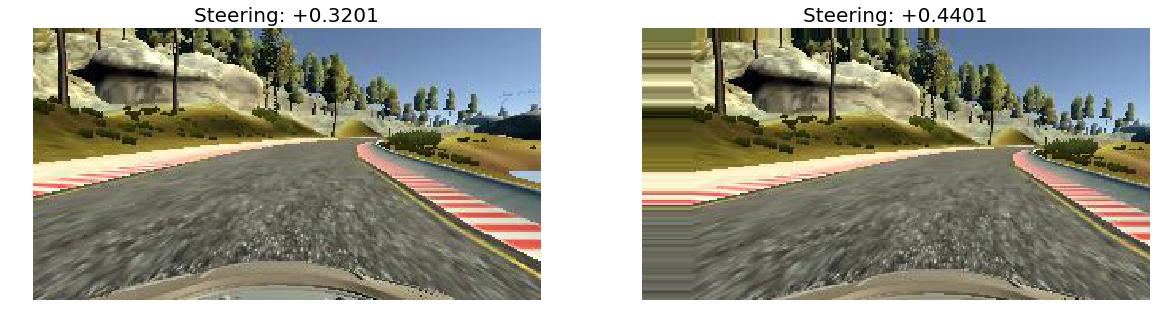

In [7]:
images = list()
steerings = list()

image, steering = generate_sample()
images.append(image)
steerings.append(steering)

def translate_image(img, steering, horz_range=30, vert_range=5):
    rows, cols, chs = img.shape
    tx = 30
    ty = 5
    steering = steering + tx * 0.004 # mul by steering angle units per pixel
    tr_M = np.float32([[1,0,tx], [0,1,ty]])
    img = cv2.warpAffine(img, tr_M, (cols,rows), borderMode=1)
    return img, steering

image, steering = translate_image(np.copy(image), steering)
images.append(image)
steerings.append(steering)
    
plot_images(images, steerings, "translate.png")

### Shadow image

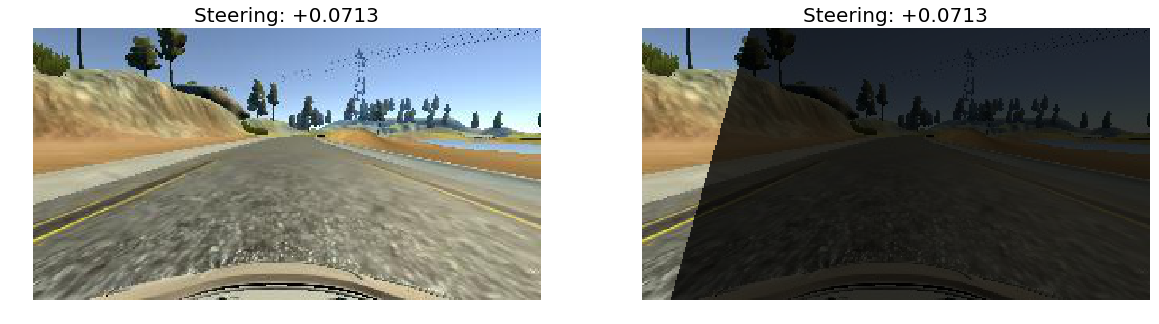

In [8]:
images = list()
steerings = list()

image, steering = generate_sample()
images.append(image)
steerings.append(steering)

def shadow_image(img, steering):
    rows, cols, chs = img.shape
    
    # Generate a separate buffer
    shadows = img.copy()

    randomUp = int(random.random() * cols)
    randomDown = int(random.random() * cols)
    
    if random.randint(0, 1):
        poly = [[randomUp,0],[cols,0],[cols,rows], [randomDown,rows]]
    else:
        poly = [[randomUp,0],[0,0],[0,rows], [randomDown,0]]
        
    cv2.fillPoly(shadows, np.array([poly]), -1)

    alpha = np.random.uniform(0.6, 0.9)
    return cv2.addWeighted(shadows, alpha, img, 1-alpha,0,img), steering

image, steering = shadow_image(np.copy(image), steering)
images.append(image)
steerings.append(steering)
    
plot_images(images, steerings, "shadow.png")

### Cut image

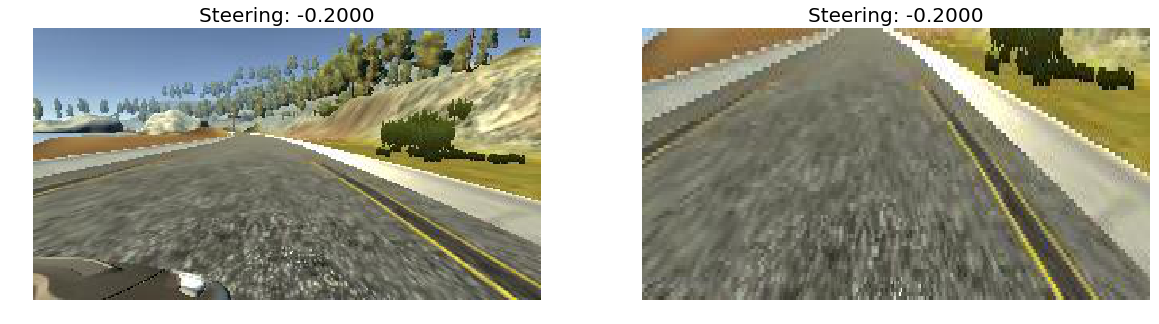

In [15]:
images = list()
steerings = list()

image, steering = generate_sample()
images.append(image)
steerings.append(steering)

def cut_image(img):
    rows,cols,channel = img.shape
    top = int(.4* rows)
    botton = int(.84 * rows)
    return img[top:botton, :, :]

image = cut_image(np.copy(image))
images.append(image)
steerings.append(steering)
    
plot_images(images, steerings, "cutted.png")

### Composed image

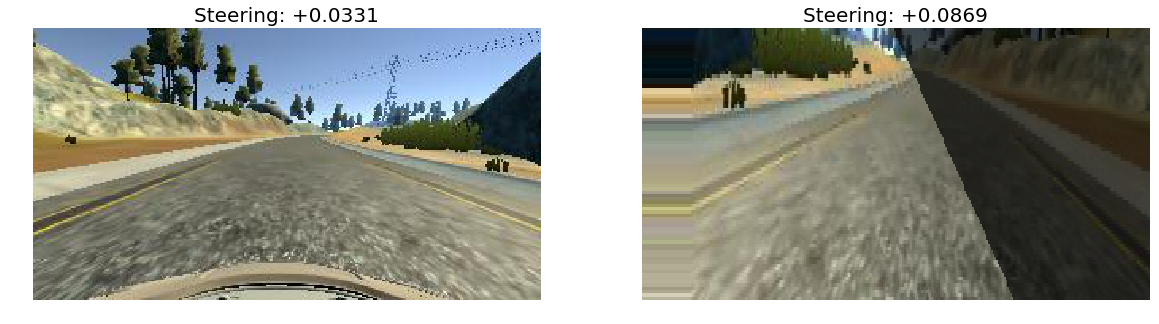

In [10]:
images = list()
steerings = list()

image, steering = generate_sample()
images.append(image)
steerings.append(steering)

image, steering = flip_image(np.copy(image), steering)
image, steering = rotate_image(np.copy(image), steering)
image, steering = translate_image(np.copy(image), steering)
image, steering = shadow_image(np.copy(image), steering)
image = cut_image(np.copy(image))

images.append(image)
steerings.append(steering)
    
plot_images(images, steerings, "composed.png")

## Example of center, left and right image

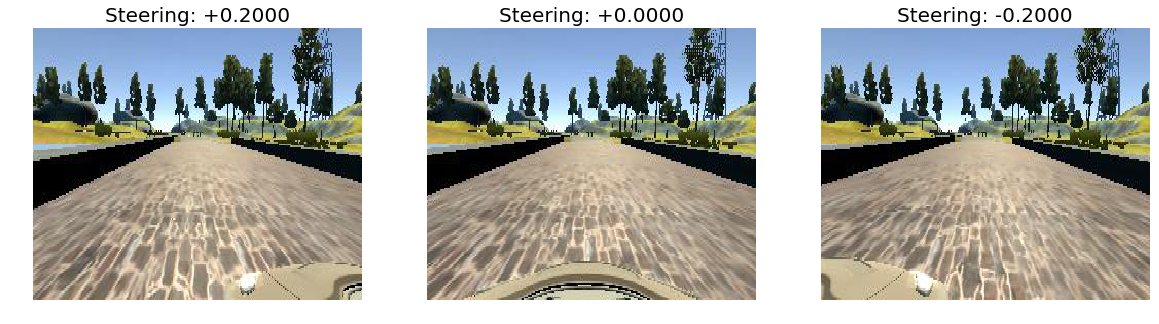

In [11]:
with open('data\driving_log.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    row = next(reader)
    
    steering = float(row[3])
    throttle = float(row[4])
    brake = float(row[5])
    speed = float(row[6])
    center = row[0]
    left = row[1].replace(" ", "")
    right = row[2].replace(" ", "")
    
    images = list()
    steerings = list()
    
    images.append(Image.open("data/" + left))
    steerings.append(steering + 0.2)
    
    images.append(Image.open("data/" + center))
    steerings.append(steering)
    
    images.append(Image.open("data/" + right))
    steerings.append(steering - 0.2)
    
plot_images(images, steerings, "center_left_right.png")

## Histogram of the given dataset

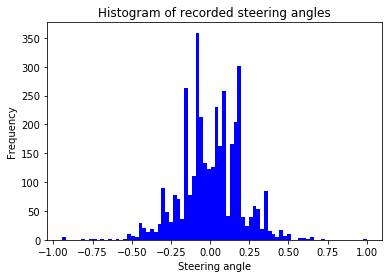

In [12]:
histogram = [x[1] for x in list_images]

def plot_histogram(histogram, name):
    fig = plt.figure()
    plt.hist(histogram, bins = 80, facecolor='blue');
    plt.xlabel('Steering angle');
    plt.ylabel('Frequency');
    plt.title('Histogram of recorded steering angles');
    fig.savefig("images/" + name, bbox_inches='tight', transparent=True)
    
plot_histogram(histogram, "histogram_dataset.png")

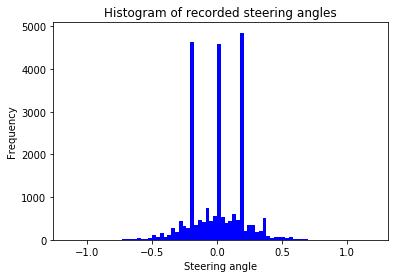

In [13]:
list_images = list()
with open('data\driving_log.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        steering = float(row[3])
        throttle = float(row[4])
        brake = float(row[5])
        speed = float(row[6])

        # Center image
        list_images.append([row[0].replace(" ", ""), steering, throttle, brake, speed])
        # Left image
        list_images.append([row[1].replace(" ", ""), steering + 0.2, throttle, brake, speed])
        # Right image
        list_images.append([row[2].replace(" ", ""), steering - 0.2, throttle, brake, speed])
            
histogram = [x[1] for x in list_images]
plot_histogram(histogram, "histogram_three_images.png")